In [1]:
import os

import shutil

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

import shutil

from sklearn.model_selection import train_test_split

from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.models import Model

from keras.optimizers import Adam

from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.models import Model

from keras.preprocessing import image

from keras.applications.vgg16 import preprocess_input

from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
import os

# Replace this with the actual folder path you extracted to
extracted_path = r"C:\Users\chand\Downloads\archive.zip\Fruit And Vegetable Diseases Dataset"

# Check if it exists and list a few items inside
if os.path.exists(extracted_path):
    print("✅ Extracted folder found!")
    print("Contents:")
    for item in os.listdir(extracted_path)[:5]:  # Show only first 5 items
        print(" -", item)
else:
    print("❌ Folder not found. You may still need to extract the zip file.")

❌ Folder not found. You may still need to extract the zip file.


In [4]:
import os

extract_path = r"C:\Users\chand\Documents\FruitDataset"  # or your extraction folder

if os.path.exists(extract_path):
    print("✅ Extraction folder found!")
    print("📂 Here are the first few items inside:")
    for item in os.listdir(extract_path)[:5]:
        print(" -", item)
else:
    print("❌ Folder not found. Please check the path.")

✅ Extraction folder found!
📂 Here are the first few items inside:
 - Fruit And Vegetable Diseases Dataset
 - output_dataset


In [5]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Path to your original dataset folder
dataset_dir = r'C:\Users\chand\Documents\FruitDataset\Fruit And Vegetable Diseases Dataset'
classes = os.listdir(dataset_dir)

# Output directory for split dataset
output_dir = r'C:\Users\chand\Documents\FruitDataset\output_dataset'
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)

    class_dir = os.path.join(dataset_dir, cls)
    
    # Filter for files only (skip directories)
    images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))][:200]

    print(f"{cls}: {len(images)} images")

    train_and_val_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_and_val_images, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))
    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))
    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))

print("✅ Dataset successfully split into train, val, and test folders.")

Apple__Healthy: 200 images
Apple__Rotten: 200 images
Banana__Healthy: 200 images
Banana__Rotten: 200 images
Bellpepper__Healthy: 200 images
Bellpepper__Rotten: 200 images
Carrot__Healthy: 200 images
Carrot__Rotten: 200 images
Cucumber__Healthy: 200 images
Cucumber__Rotten: 200 images
Grape__Healthy: 200 images
Grape__Rotten: 200 images
Guava__Healthy: 200 images
Guava__Rotten: 200 images
Jujube__Healthy: 200 images
Jujube__Rotten: 200 images
Mango__Healthy: 200 images
Mango__Rotten: 200 images
Orange__Healthy: 200 images
Orange__Rotten: 200 images
Pomegranate__Healthy: 200 images
Pomegranate__Rotten: 200 images
Potato__Healthy: 200 images
Potato__Rotten: 200 images
Strawberry__Healthy: 200 images
Strawberry__Rotten: 200 images
Tomato__Healthy: 200 images
Tomato__Rotten: 200 images
✅ Dataset successfully split into train, val, and test folders.


In [6]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
dataset_dir =r'C:\Users\chand\Documents\FruitDataset\output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

# Define image size expected by the pre-trained model
IMG_SIZE = (224, 224)

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load and resize the images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'  # Use 'categorical' if you have more than 2 classes
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Print class indices for confirmation
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

Found 3355 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.
{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'Grape__Healthy': 10, 'Grape__Rotten': 11, 'Guava__Healthy': 12, 'Guava__Rotten': 13, 'Jujube__Healthy': 14, 'Jujube__Rotten': 15, 'Mango__Healthy': 16, 'Mango__Rotten': 17, 'Orange__Healthy': 18, 'Orange__Rotten': 19, 'Pomegranate__Healthy': 20, 'Pomegranate__Rotten': 21, 'Potato__Healthy': 22, 'Potato__Rotten': 23, 'Strawberry__Healthy': 24, 'Strawberry__Rotten': 25, 'Tomato__Healthy': 26, 'Tomato__Rotten': 27}
{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'G

🖼️ Showing: 139.jpg


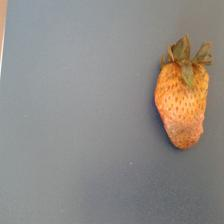

In [8]:
import os
import random
from IPython.display import Image, display

# Specify the path to your class folder
folder_path = r'C:\Users\chand\Documents\FruitDataset\output_dataset\test\Strawberry__Rotten'  # Update if needed

# Check if the folder exists
if os.path.exists(folder_path):
    # Get all image files with common extensions
    image_files = [f for f in os.listdir(folder_path)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png')) and 
                   os.path.isfile(os.path.join(folder_path, f))]
    
    if image_files:
        # Pick a random image
        selected_image = random.choice(image_files)
        image_path = os.path.join(folder_path, selected_image)
        
        # Display it
        print(f"🖼️ Showing: {selected_image}")
        display(Image(filename=image_path))
    else:
        print("⚠️ No image files found in the folder.")
else:
    print("❌ Folder path does not exist. Please check the directory.")

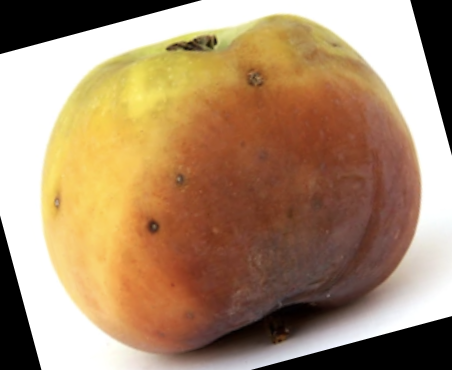

In [9]:
import os
import random
from IPython.display import Image, display

# Specify the path to your image folder
folder_path = r'C:\Users\chand\Documents\FruitDataset\output_dataset\test\Apple__Rotten'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

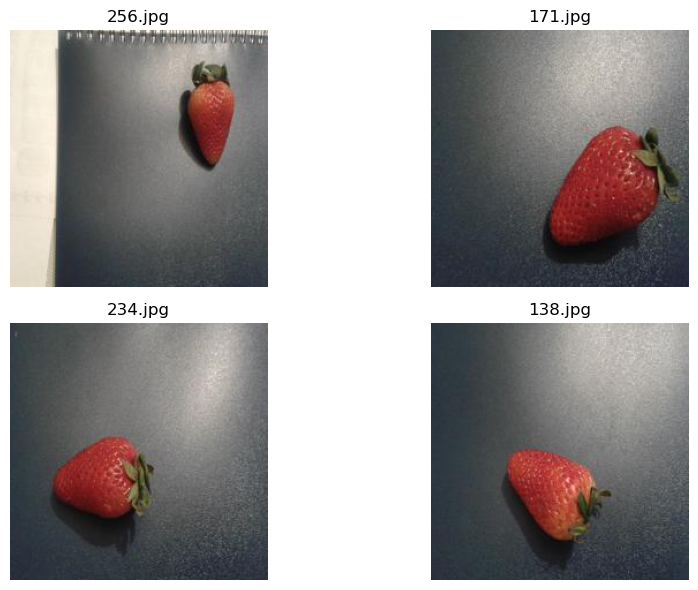

In [10]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set your image folder path
folder_path = r'C:\Users\chand\Documents\FruitDataset\output_dataset\train\Strawberry__Healthy'

# Get all image filenames in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Pick 4 random images
selected_images = random.sample(image_files, 4)

# Plot the images
plt.figure(figsize=(10, 6))
for i, img_name in enumerate(selected_images):
    img_path = os.path.join(folder_path, img_name)
    img = mpimg.imread(img_path)
    
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{img_name}")

plt.tight_layout()
plt.show()

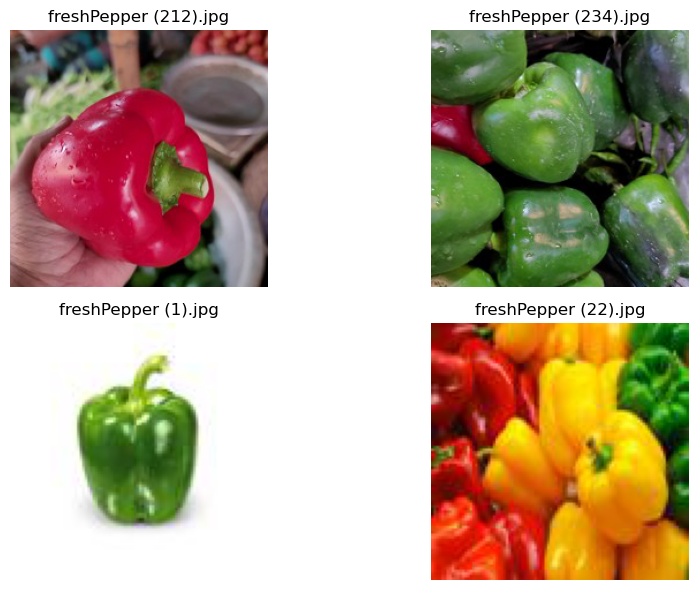

In [12]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set your image folder path
folder_path = r'C:\Users\chand\Documents\FruitDataset\output_dataset\train\Bellpepper__Healthy'

# Get all image filenames in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Pick 4 random images
selected_images = random.sample(image_files, 4)

# Plot the images
plt.figure(figsize=(10, 6))
for i, img_name in enumerate(selected_images):
    img_path = os.path.join(folder_path, img_name)
    img = mpimg.imread(img_path)
    
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{img_name}")

plt.tight_layout()
plt.show()

In [11]:
trainpath = r'C:\Users\chand\Documents\FruitDataset\output_dataset\train'
testpath = r'C:\Users\chand\Documents\FruitDataset\output_dataset\test'

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, shear_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train = train_datagen.flow_from_directory(trainpath, target_size=(224,224), batch_size=20)
test = test_datagen.flow_from_directory(testpath, target_size=(224,224), batch_size=20)

# Output:
# Found 3358 images belonging to 28 classes.
# Found 1120 images belonging to 28 classes.

Found 3355 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.


In [12]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

vgg = VGG16(include_top=False, input_shape=(224, 224, 3))

for layer in vgg.layers:
    print(layer)

len(vgg.layers)  # 19

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
output = Dense(28, activation='softmax')(x)

vgg16 = Model(vgg.input, output)

vgg16.summary()

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 28)             │       702,492 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,417,180 (58.81 MB)

 Trainable params: 702,492 (2.68 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [16]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Use the correct keyword 'learning_rate' instead of the deprecated 'lr'
opt = Adam(learning_rate=0.0001)

# Assuming your model is named 'vgg16'
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Compile the model
vgg16.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = vgg16.fit(train, 
                    validation_data=test,
                    epochs=15,
                    steps_per_epoch=20,
                    callbacks=[early_stopping])



Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 887s 46s/step - accuracy: 0.0510 - loss: 3.3573 - val_accuracy: 0.2732 - val_loss: 2.7487
Epoch 2/15
 8/20 ━━━━━━━━━━━━━━━━━━━━ 2:19 12s/step - accuracy: 0.3798 - loss: 2.5705

C:\Users\chand\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 880s 46s/step - accuracy: 0.3703 - loss: 2.5381 - val_accuracy: 0.4375 - val_loss: 2.2299
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 432s 22s/step - accuracy: 0.4099 - loss: 2.2491 - val_accuracy: 0.5232 - val_loss: 1.9264
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 227s 12s/step - accuracy: 0.5311 - loss: 1.9379 - val_accuracy: 0.5848 - val_loss: 1.6780
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 234s 12s/step - accuracy: 0.5406 - loss: 1.7394 - val_accuracy: 0.6259 - val_loss: 1.5170
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 232s 12s/step - accuracy: 0.6752 - loss: 1.4459 - val_accuracy: 0.6884 - val_loss: 1.3612
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 232s 12s/step - accuracy: 0.7390 - loss: 1.2887 - val_accuracy: 0.7214 - val_loss: 1.2576
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 226s 12s/step - accuracy: 0.7068 - loss: 1.2409 - val_accuracy: 0.7116 - val_loss: 1.1955
Epoch 9/15
 8/20 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.7136 - loss: 1.1496

C:\Users\chand\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


20/20 ━━━━━━━━━━━━━━━━━━━━ 190s 10s/step - accuracy: 0.7317 - loss: 1.1196 - val_accuracy: 0.7205 - val_loss: 1.1509
Epoch 10/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 220s 11s/step - accuracy: 0.8113 - loss: 1.0180 - val_accuracy: 0.7455 - val_loss: 1.0790
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 227s 12s/step - accuracy: 0.7319 - loss: 1.1441 - val_accuracy: 0.7482 - val_loss: 1.0407
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 231s 12s/step - accuracy: 0.7402 - loss: 1.0558 - val_accuracy: 0.7643 - val_loss: 0.9834
Epoch 13/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 234s 12s/step - accuracy: 0.8215 - loss: 0.8909 - val_accuracy: 0.7804 - val_loss: 0.9389
Epoch 14/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 257s 13s/step - accuracy: 0.8083 - loss: 0.8329 - val_accuracy: 0.7893 - val_loss: 0.9036
Epoch 15/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 236s 12s/step - accuracy: 0.8317 - loss: 0.8607 - val_accuracy: 0.8134 - val_loss: 0.8576


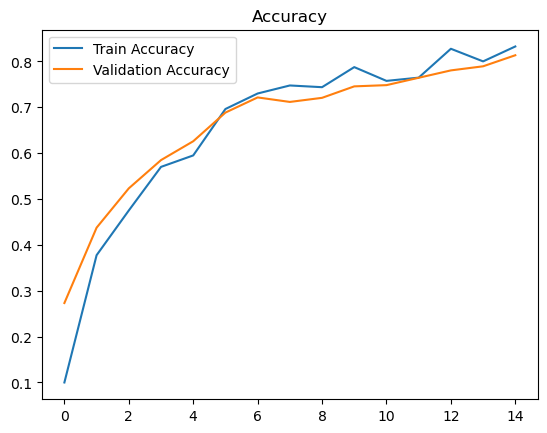

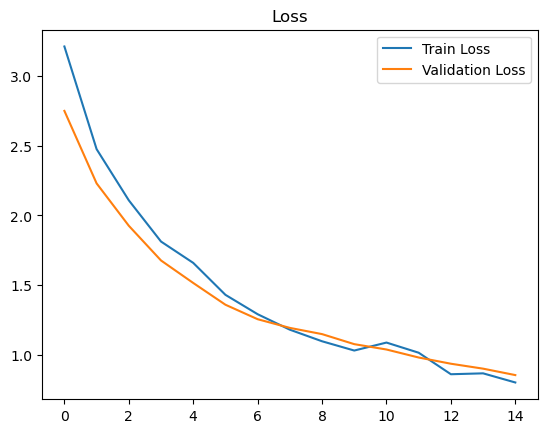

In [17]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [21]:
import os

folder_path = r'C:\Users\chand\Documents\FruitDataset\output_dataset\train\Orange__Healthy'
print(os.listdir(folder_path))  # Lists all files in that directory

['freshOrange (1).jpg', 'freshOrange (1).png', 'freshOrange (10).jpg', 'freshOrange (10).png', 'freshOrange (101).jpg', 'freshOrange (101).png', 'freshOrange (102).jpg', 'freshOrange (103).png', 'freshOrange (104).jpg', 'freshOrange (104).png', 'freshOrange (105).jpg', 'freshOrange (106).png', 'freshOrange (107).png', 'freshOrange (108).jpg', 'freshOrange (108).png', 'freshOrange (109).jpg', 'freshOrange (109).png', 'freshOrange (11).jpg', 'freshOrange (110).jpg', 'freshOrange (110).png', 'freshOrange (111).jpg', 'freshOrange (111).png', 'freshOrange (112).png', 'freshOrange (113).jpg', 'freshOrange (113).png', 'freshOrange (115).jpg', 'freshOrange (115).png', 'freshOrange (116).png', 'freshOrange (117).jpg', 'freshOrange (117).png', 'freshOrange (118).jpg', 'freshOrange (119).jpg', 'freshOrange (12).png', 'freshOrange (120).jpg', 'freshOrange (120).png', 'freshOrange (121).jpg', 'freshOrange (123).jpg', 'freshOrange (124).png', 'freshOrange (125).jpg', 'freshOrange (126).png', 'freshO

In [23]:
preds = vgg16.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


In [25]:
labels = {v: k for k, v in train_generator.class_indices.items()}

In [26]:
print("Predicted Label:", labels[np.argmax(preds)])

Predicted Label: Guava__Rotten


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


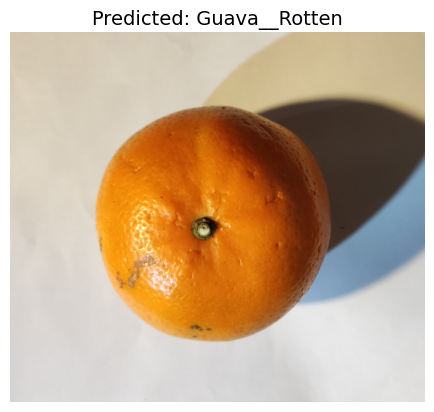

In [36]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img_path = r'C:\Users\chand\Documents\FruitDataset\output_dataset\train\Orange__Healthy\freshOrange (127).jpg'
img = load_img(img_path, target_size=(224, 224))

img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
x = np.expand_dims(x, axis=0)

# Predict
preds = vgg16.predict(x)
predicted_label = labels[np.argmax(preds)]

# Display the image with predicted label
img_disp = mpimg.imread(img_path)
plt.imshow(img_disp)
plt.axis('off')
plt.title(f"Predicted: {predicted_label}", fontsize=14)
plt.show()

In [52]:
vgg16.save('fresh_vs_rotten.h5')

In [56]:
import os
os.makedirs('templates', exist_ok=True)
os.makedirs('static/uploads', exist_ok=True)